In [1]:
# Data from https://zenodo.org/record/3893508#.Y-UsfuzMKoQ
from pathlib import Path
anchor = Path.cwd() / "rip_fracture_data/stacks/"
paths = [anchor / f"RibFrac{i}-image.nii.gz" for i in range(10,20)]

In [5]:
import napari

viewer = napari.Viewer()
viewer.theme = "light"
viewer.dims.ndisplay = 3

In [9]:
viewer.camera.angles = (0,0,0)

In [5]:
layers = []
for p in paths:
    x = viewer.open(p, plugin="napari-medical-image-formats")[0]
    x.colormap = "gray_r"
    x.contrast_limits= [-256,1615]
    x.visible = 0
    layers.append(x)
viewer.camera.angles = (0, 7, 4)

In [4]:
from manim import *

Manim Community v0.17.2

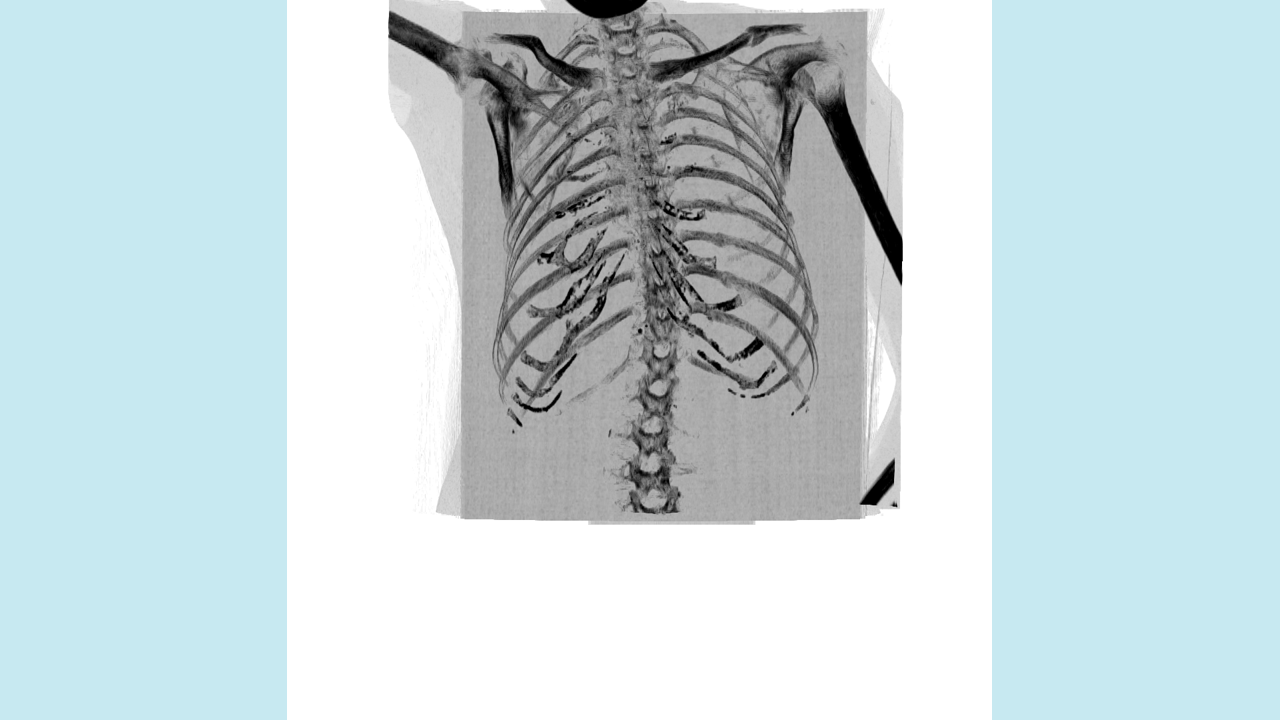

In [7]:
def make_plot(zoom, angle1, angle2, angle3):
    viewer.camera.zoom = zoom
    viewer.camera.angles = (angle1, angle2, angle3)
    img = viewer.screenshot(canvas_only=True, flash=False)
    return img

class Example(Scene):
    def construct(self):
        self.camera.background_color = BLUE_A
        tr_zoom = ValueTracker(1)
        tr_angle1 = ValueTracker(0)
        tr_angle2 = ValueTracker(7)
        tr_angle3 = ValueTracker(4)
        r = Rectangle(color=BLUE)
        image = ImageMobject(
            make_plot(
                tr_zoom.get_value(),
                tr_angle1.get_value(),
                tr_angle2.get_value(),
                tr_angle3.get_value(),
            )
        )
        self.add(image)

        def update_image(mob):
            new_mob = ImageMobject(
                make_plot(
                    tr_zoom.get_value(),
                    tr_angle1.get_value(),
                    tr_angle2.get_value(),
                    tr_angle3.get_value(),
                )
            )
            mob.become(new_mob)

        image.add_updater(update_image)
        for l in layers:
            self.wait(0.5)
            l.visible = 1
            self.play(tr_zoom.animate.set_value(1), run_time=0.5) # just invokes the make_plot function, no effect to the scene.
            self.play(tr_zoom.animate.set_value(2), run_time=1.0)
            self.play(
                tr_angle1.animate.set_value(-2),
                tr_angle2.animate.set_value(-11),
                tr_angle3.animate.set_value(-34),
                run_time=1.0,
            ) 
            self.wait(0.2)
            self.play(tr_zoom.animate.set_value(1), run_time=1.0)
            self.play(
                        tr_angle1.animate.set_value(0),
                        tr_angle2.animate.set_value(7),
                        tr_angle3.animate.set_value(4),
                        run_time=1.0,
                    )
            
            l.visible = 0

%manim -v WARNING -qm  --disable_caching --progress_bar None Example